# Implement models in Stan

## Call center data set — exponential likelihood with gamma prior

In [1]:
# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pystan

# load call center data set
waiting_times_day = np.loadtxt('call_center.csv')

In [2]:
# data pre-processing
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# get data for 11th hour
waiting_times_hour = waiting_times_per_hour[11]
print("{:d} call during 11th hour.".format(len(waiting_times_hour)))

892 call during 11th hour.


In [3]:
stan_code = """

data {
    real<lower=0> alpha;   // prior hyperparameters for gamma 
    real<lower=0> beta;   // prior hyperparameters for gamma 
    int<lower=0> n;   // number of call during the hour
    vector[n] waiting_times_hour;   // call waiting times
}

parameters {
    real lambda;  // the probability of call
}

model {
    lambda ~ gamma(alpha, beta);
    waiting_times_hour ~ exponential(lambda);
}

"""

exponential_gamma_stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c0ad0931853126a0e6315f43bcb9f559 NOW.
/usr/local/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/k8/dkychj2n5c98xy85t13b1md40000gn/T/tmp9iwjqu7c/stanfit4anon_model_c0ad0931853126a0e6315f43bcb9f559_7142811583325279888.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [4]:
stan_data = {
    "alpha": 1,
    "beta": 0.25,
    "n": len(waiting_times_hour),
    "waiting_times_hour": waiting_times_hour,
}

results = exponential_gamma_stan_model.sampling(data=stan_data)
print(results)

Inference for Stan model: anon_model_c0ad0931853126a0e6315f43bcb9f559.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda  14.88    0.01    0.5  13.92  14.55  14.88  15.22  15.86   1216    1.0
lp__   1513.7    0.01   0.68 1511.8 1513.5 1514.0 1514.1 1514.2   2047    1.0

Samples were drawn using NUTS at Fri Oct 19 21:22:31 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


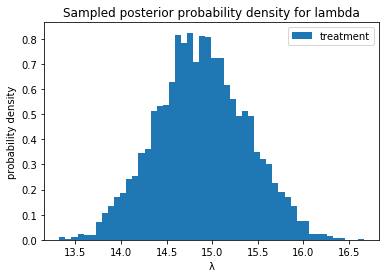

Posterior 95% interval over lambda: [13.91888387 15.86209869]


In [5]:
samples = results.extract()

# plot posterior histograms
plt.hist(samples['lambda'], bins=50, density=True, label='treatment')
plt.title('Sampled posterior probability density for lambda')
plt.xlabel('λ')
plt.ylabel('probability density')
plt.legend()
plt.show()

# posterior 95% confidence interval
print('Posterior 95% interval over lambda:', np.percentile(samples['lambda'], [2.5, 97.5]))

## Normal likelihood with normal-inverse-gamma prior

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# load data
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data")

200 data


In [7]:
stan_code = """

data {
    real<lower=0> mu;
    real<lower=0> nu;
    real<lower=0> alpha;   // prior hyperparameters for gamma 
    real<lower=0> beta;   // prior hyperparameters for gamma 
    int<lower=0> n;   // length of data
    vector[n] data_set;   // data
}

parameters {
    real sigma2;
    real x;
}

model {
    sigma2 ~ inv_gamma(alpha, beta);
    x ~ normal(mu, sigma2/nu);
    data_set ~ normal(x, sqrt(sigma2));
}

"""

normal_inverse_gamma_stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c6f7bd945788c72a51d3425ce712ba75 NOW.
/usr/local/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/k8/dkychj2n5c98xy85t13b1md40000gn/T/tmphtfut0kz/stanfit4anon_model_c6f7bd945788c72a51d3425ce712ba75_6437476439639438699.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [8]:
stan_data = {
    "mu": 0,
    "nu": 0.054,
    "alpha": 1.12,
    "beta": 0.4,
    "n": len(data),
    "data_set": data,
}

results = normal_inverse_gamma_stan_model.sampling(data=stan_data)
print(results)

Inference for Stan model: anon_model_c6f7bd945788c72a51d3425ce712ba75.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma2   3.59  6.3e-3   0.36   2.95   3.34   3.57   3.81   4.37   3240    1.0
x        3.07  2.2e-3   0.13   2.81   2.98   3.07   3.15   3.33   3499    1.0
lp__   -236.5    0.02   0.99 -239.1 -236.9 -236.1 -235.7 -235.5   1669    1.0

Samples were drawn using NUTS at Fri Oct 19 21:23:06 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 95% interval over x: [2.80565101 3.32521065]
Posterior 95% interval over sigma2: [2.95328909 4.36981581]


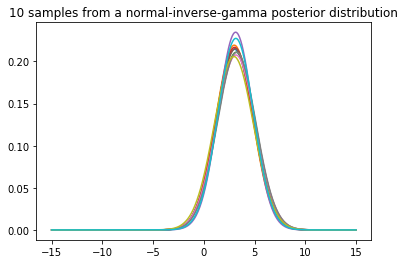

In [9]:
samples = results.extract()

# posterior 95% confidence interval
print('Posterior 95% interval over x:', np.percentile(samples['x'], [2.5, 97.5]))
print('Posterior 95% interval over sigma2:', np.percentile(samples['sigma2'], [2.5, 97.5]))

# Plot the normal distributions corresponding to the samples
num_samples = 10
plot_x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    plot_y = stats.norm.pdf(plot_x, loc=np.random.choice(samples['x'], 1), scale=np.sqrt(np.random.choice(samples['sigma2'], 1)))
    plt.plot(plot_x, plot_y)
plt.title("{:d} samples from a normal-inverse-gamma posterior distribution".format(num_samples))
plt.show()

## Log-normal HRTEM data

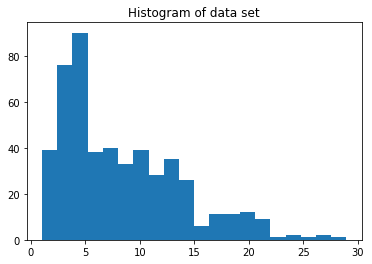

500 data, min: 1.051827, max: 28.942578


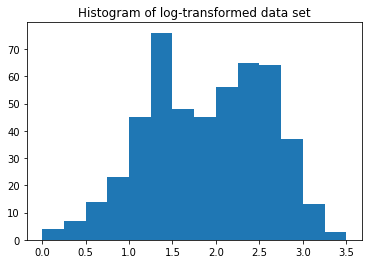

500 data, min: 0.050529, max: 3.365314


In [10]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# load data
data = np.loadtxt('hrtem.csv')
plt.hist(data, bins=20)
plt.title('Histogram of data set')
plt.show()
print('%i data, min: %f, max: %f' % (len(data), min(data), max(data)))

# convert data into log data
log_data = np.log(data)
plt.hist(log_data, bins=np.linspace(0, 3.5, 15))
plt.title('Histogram of log-transformed data set')
plt.show()
print('%i data, min: %f, max: %f' % (len(log_data), min(log_data), max(log_data)))

In [11]:
stan_data = {
    "mu": 2.3,
    "nu": 0.1,
    "alpha": 2,
    "beta": 5,
    "n": len(log_data),
    "data_set": log_data,
}

results = normal_inverse_gamma_stan_model.sampling(data=stan_data)
print(results)

Inference for Stan model: anon_model_c6f7bd945788c72a51d3425ce712ba75.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma2   0.49  5.2e-4   0.03   0.44   0.47   0.49   0.52   0.56   3708    1.0
x        1.89  4.8e-4   0.03   1.83   1.87   1.89   1.91   1.96   4267    1.0
lp__   -76.11    0.02   1.01 -78.76  -76.5  -75.8 -75.38 -75.12   1765    1.0

Samples were drawn using NUTS at Fri Oct 19 21:23:07 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 95% interval over x: [1.83014705 1.95525897]
Posterior 95% interval over sigma2: [0.43690563 0.56046326]


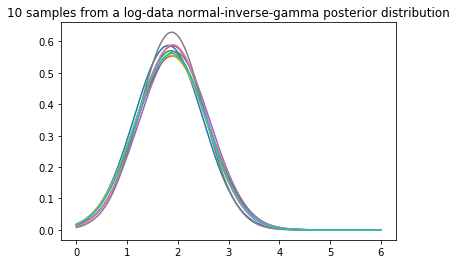

In [12]:
samples = results.extract()

# posterior 95% confidence interval
print('Posterior 95% interval over x:', np.percentile(samples['x'], [2.5, 97.5]))
print('Posterior 95% interval over sigma2:', np.percentile(samples['sigma2'], [2.5, 97.5]))

# Plot the normal distributions corresponding to the samples
num_samples = 10
plot_x = np.linspace(0, 6, 500)
for i in range(num_samples):
    plot_y = stats.norm.pdf(plot_x, loc=np.random.choice(samples['x'], 1), scale=np.sqrt(np.random.choice(samples['sigma2'], 1)))
    plt.plot(plot_x, plot_y)
plt.title("{:d} samples from a log-data normal-inverse-gamma posterior distribution".format(num_samples))
plt.show()